Using TensorFlow backend.


 7667712/11490434 [===================>..........] - ETA: 0s(50000, 28, 28) (50000,)


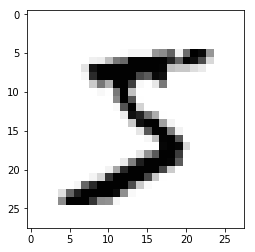

In [2]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

In [3]:
X_train = X_train.reshape([50000, 784])
X_test = X_test.reshape([10000, 784])

In [4]:
import tensorflow as tf

In [24]:
X = tf.placeholder(tf.float32, shape = (None, 784))
Y = tf.placeholder(tf.float32, shape = (None,10))
keep_prob = tf.placeholder(tf.float32)

In [16]:
W = tf.get_variable("W", [784, 128], initializer = tf.contrib.layers.xavier_initializer())
b = tf.get_variable("b", [128], initializer = tf.zeros_initializer())

In [21]:
W1 = tf.get_variable("W2", [128, 128], initializer = tf.contrib.layers.xavier_initializer())
b1 = tf.get_variable("b2", [128], initializer = tf.zeros_initializer() )

In [22]:
W_3 = tf.get_variable("W_3", [128, 10], initializer = tf.contrib.layers.xavier_initializer())
b_3 = tf.get_variable("b_3", [10], initializer = tf.zeros_initializer())

In [26]:
Z1 = tf.matmul(X,W) + b
A1 = tf.nn.relu(Z1)
A1 = tf.nn.dropout(A1, keep_prob)
Z2 = tf.matmul(A1,W1) + b1
A2 = tf.nn.relu(Z2)
A2 = tf.nn.dropout(A2, keep_prob)
Z3 = tf.matmul(A2,W_3) + b_3
A3 = tf.nn.sigmoid(Z3)

In [28]:
def compute_cost(A3,Y):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = Y, logits = A3))
    return cost

In [29]:
cost = compute_cost(A3,Y)
optimizer = tf.train.AdamOptimizer(0.01).minimize(cost)
init = tf.global_variables_initializer()

In [31]:
import numpy as np
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

In [ ]:
batch_size = 500
with tf.Session() as sess:
    sess.run(init)
    train_cost = []
    test_cost = []
    for epoch in range(100):
        for i in range(0, 50000, batch_size):
            sess.run(optimizer, feed_dict = {X:X_train[i:i+batch_size], Y:y_train[i:i+batch_size], keep_prob : 0.63})
            train_cost.append(sess.run(cost, feed_dict = {X:X_train, Y:y_train, keep_prob : 1}))
            test_cost.append(sess.run(cost, feed_dict = {X:X_test, Y:y_test, keep_prob : 1}))
            if epoch%10==9:
                print("test cost after " + str(epoch+1 ) + "epochs:" + str(test_cost[-1]) )
            iterations = list(range(100))    
    plt.plot(iterations, train_cost, label = 'train')
    plt.plot(iterations, test_cost, label = 'test')
    plt.xlabel('iterations')
    plt.ylabel('cost')
    plt.show()
    predict_op = tf.argmax(Z3, 1)
    correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))

    # Calculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    train_accuracy = accuracy.eval({X: X_train, Y: y_train, keep_prob : 1})
    test_accuracy = accuracy.eval({X: X_test, Y: y_test, keep_prob : 1})
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)
    